# <center>Projet ADEME – Livrable 2 – Modélisation et études statistiques</center>
<center><img src="./public/Source/Image/images.png"/></center>

## Sommaires

* [1.Introduction](#Introduction)
* [2.Contextualisation](#TSP)
    * [2.1 Périmètre du problème](#Perimetre)
* [3.Modélisation, implémentation et exploitation](#Titre)
    * [3.1 Modélisation](#Partie1)
        * [3.1.1. Heuristique ou Métaheuristique ?](#Methode)
        * [3.1.2.Méthode de résolution](#Algorithme)
        * [3.1.3.Choix de l'algorithme](#Algorithme)
    * [3.2 implémentation et exploitation](#Partie2)
        * [3.2.1.Implémentation de l'algorithme](#Implémentation)
        * [3.2.2.Démonstration de l'algorithme](#Exploitation)
        * [3.2.3.Etude expérimentale](#Exploitation)
            * [3.2.3.1.Plan d'expérience](#Exploitation)
    * [4.Bibliographie](#Bibliographie)

## 1.Introduction <a class="anchor" id="Introduction"></a>

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Vous faites partie de l’équipe (4 personnes) mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Vous avez décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, vous hésitez à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.

## 2.Contextualisation  <a class="anchor" id="TSP"></a>

Dans ce projet, nous étudions la gestion de tournées de livraison sur un réseau routier pour minimiser la durée totale des livraison. Nous devons étudier le périmètre du problème avec la mise en place d'une version basique de notre problème puis ajouter certaine contraintes pour rendre notre problème plus réaliste.

### 2.1 Périmètre du problème <a class="anchor" id="Perimetre"></a>

Nous avons ici, un problème qui consiste à trouver si "existe-t-il un circuit où un camion puisse passer une seule fois par tous les sommets dans le graphe G et dont la somme des valeurs des arêtes inférieur à une distance k" c'est notre problème décisionnel.

Nous avons décidé de rajouter deux contraintes dans la version de notre problème : 

   - k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.
   - Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic
        - Bloquer certaines arêtes selon le type de véhicule 

Nous avons donc un nouveau problème qui se rapproche du problème du voyageur de commerce mais avec une simultanéité des livraison dans une fenêtre de temps avec une évolution du trafic. 

Nous avons donc un nouveau problème décisionnel : "existe-t-il un circuit où i camion puisse passer une seule fois par tous les sommets dans le graphe G et dont la somme des valeurs des arêtes maximum soit inférieur à une distance k"

Nous pouvons maintenant dire que notre problème est une extension du [problème de voyageur de commerce (TSP)](https://docplayer.fr/33709891-Le-probleme-du-voyageur-de-commerce.html) avec des contraintes supplémentaires. Ce problème correspond donc au [Problème de tournées de véhicules (VRP)](https://www.sciencedirect.com/science/article/abs/pii/S0968090X0900151X).

Le VRP se modélise avec un graphe complet, connexe et pondérer:

<center><img src="./public/Source/Image/Carte_TSP.png"/></center>

Nous avons ici un ensemble de sommet qui sont tous relié entre eux, notre but est de réalisé un cycle qui part d'un sommet u pour revenir à celui-ci.

La solution s'exprime avec deux valeurs de sortie :

   - une liste des chemins à parcourir pour les camions [[$u$, $u_{i+1}$,...,$u_{n}$,$u$],...,[$v$, $v_{i+1}$,...,$v_{n}$,$v$]]
   - une liste des poids des chemins parcouru [$\sum_{n}^{1} u-u_{n+1}$,...,$\sum_{n}^{1} v-v_{n+1}$]
   
   
## 3.Modélisation, implémentation et exploitation <a class="anchor" id="Titre"></a>


### 3.1.Modélisation<a class="anchor" id="Partie1"></a>

#### 3.1.1. Heuristique ou Métaheuristique ?<a class="anchor" id="metaheuristique"></a> 

En complément de la programmation mathématique, les heuristiques sont des méthodes de résolution purement algorithmiques qui permettent d’obtenir des solutions à n’importe quel problème décisionnel rapidement. En effet, dans certains cas, le prix à payer pour utiliser des méthodes de programmation mathématique peut être une très grande complexité mathématique qui se traduit par des temps de calculs souvent longs. Parce qu’en pratique, une solution à un problème décisionnel doit être proposée dans des temps raisonnables, on sacrifie en partie la qualité de la solution au sens purement mathématique pour accélérer le processus de résolution.

Une heuristique est une stratégie de bon sens pour se déplacer intelligemment dans l’espace des solutions, afin d’obtenir une solution approchée, la meilleure possible, dans un délai de temps raisonnable.

Deux types d’heuristiques sont principalement utilisées : les heuristiques de construction (par exemple les méthodes gloutonnes), qui construisent itérativement une solution, et les heuristiques de descente, qui à partir d’une solution donnée cherchent un optimum local.

Les heuristiques sont dépendantes du problème à résoudre, principalement dans le choix du voisinage (donc dans le déplacement dans l’espace des solutions).

Des heuristiques plus poussées ont été mises au point et ont données naissance à une nouvelle famille d’algorithmes : les méta-heuristiques.

Le but d’une méta-heuristique, est de réussir à trouver un optimum global. Pour cela, l’idée est à la fois de parcourir l’espace de recherche, et d’explorer les zones qui paraissent prometteuses ; mais sans être « piégé » par un optimum local.

Les méta-heuristiques sont souvent inspirées de processus naturels et sont de plus en plus hybridées avec d’autres méthodes de recherche opérationnelle.

#### 3.1.2.Méthode de résolution<a class="anchor" id="resolution"></a>


#### 3.1.3.Choix de l'algorithme<a class="anchor" id="algorithme"></a>

L’algorithme que nous avons utilisé pour traiter ce problème d’optimisation combinatoire est un 
algorithme métaheuristique « recherche tabou ».

La recherche tabou est une méta heuristique pour l'optimisation des problèmes combinatoires, ce qui signifie qu'elle trouve des solutions suffisamment bonnes pour les problèmes NP-difficiles. Par définition, un problème NP-difficile ne peut pas être résolu précisément en temps polynomial. Au lieu de cela, nous sacrifions une solution parfaite pour une solution "suffisamment" bonne qui peut être calculée en temps réel. Dans l'industrie, il y a beaucoup de compromis entre ce qui fonctionne parfaitement et ce qui fonctionne assez bien. La recherche taboue est une méta-heuristique qui fonctionne souvent assez bien pour trouver rapidement une solution quasi optimale.

Cette méthode est une métaheuristique itérative qualifiée de recherche locale au sens large. 
L'idée de la recherche tabou consiste, à partir d'une position donnée, à en explorer le 
voisinage et à choisir la position dans ce voisinage qui minimise la fonction objectif. 

Ce qui rend la recherche tabou unique, c'est qu'elle exploite la mémoire à court terme pour éviter de revoir les anciennes solutions. Décomposons à quoi cela ressemble. Voici un diagramme qui montre bien le principe.

<center><img src="./public/Source/Image/Recherche_tabou.jpg"></center>

### 3.2.Implémentation et exploitation <a class="anchor" id="Partie2"></a>
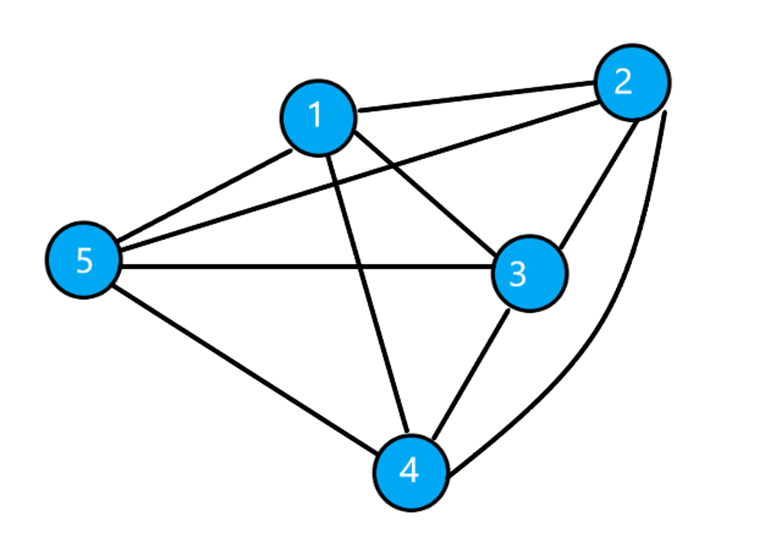
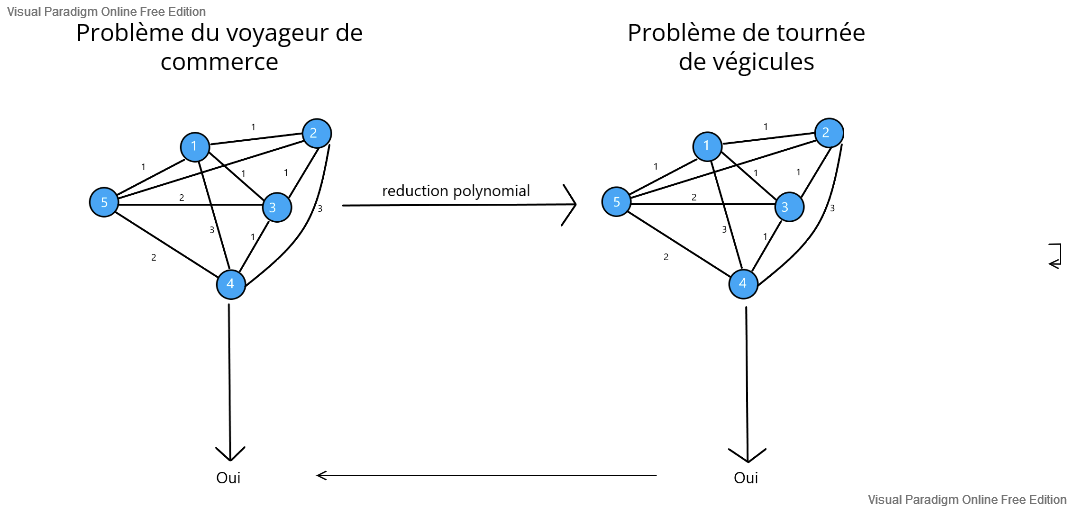
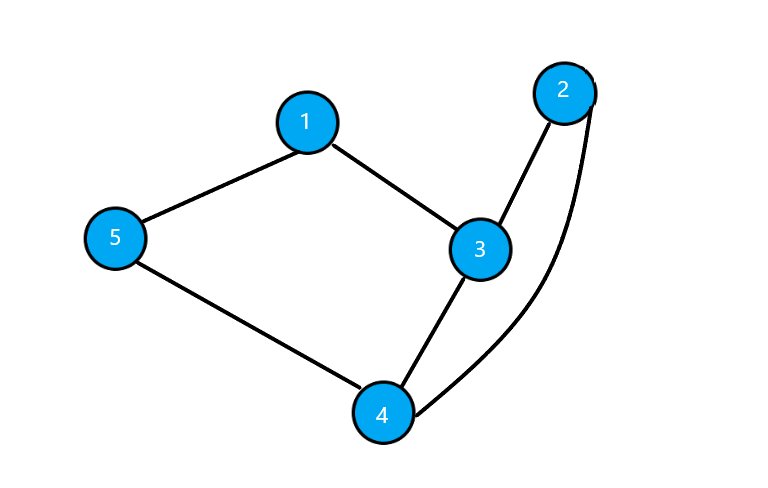

### 3.2.1 Génération de la matrice d'adjacence <a class="anchor" id="matriceAdjacence"></a>

Nous avons implemanter une fonction nommée "generer_matrice_adjacence()" qui permet comme son nom l'indique générer notre matrice d'adjacence, elle prend en paramètre deux arguments le nombre de ville et le type du graphe (graphe complet / graphe non-complet).

In [53]:
import numpy as np
import random

random.seed(10)

nombre_ville = 20  # On definit le nombre de ville

def generer_matrice_adjacence(nombre_ville,typeDeGraphe):   # Cette fonction prend en paramètre deux arguments le nombre de ville et le type dgu graphe   
    matrice = np.empty((nombre_ville, nombre_ville))   # On initialise la matrice           
    
    if(typeDeGraphe == 'Complete'):          # 1er Cas : Graphe complet     
        
        for i in range(nombre_ville):        # On parcourt notre matrice symétrique   
            for j in range(i,nombre_ville):    
                valeur = 1 if i!=j else 0    # Dans le cas ou les index i et j sont égaux (position diagonal) on met la valeur à 0
                matrice[i][j] = valeur       # Toutes les valeurs (hors diagonal) sont égales à 1
                matrice[j][i] = valeur
    else:
         for i in range(nombre_ville):       # 2eme ca : Graphe non complet 
            for j in range(i,nombre_ville):
                valeur = random.randint(0,1)  if i!=j else 0   
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matriceAdjacence = generer_matrice_adjacence(nombre_ville, "Not-Complete")
print("Matrice d'adjacence graphe non-complet : \n",matriceAdjacence)

print("\n \n")     

matriceAdjacence = generer_matrice_adjacence(nombre_ville, "Complete")
print("Matrice d'adjacence graphe complet : \n",matriceAdjacence)

Matrice d'adjacence graphe non-complet : 
 [[0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1

### 3.2.2 Génération du graphe complet <a class="anchor" id="lister_voisins"></a>

Pour la génération du graphe nous avons utilisé la librairie networkx qui prend en paramètre la matrice d'adjacence et qui genre un graphe.

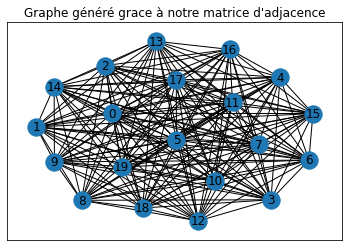

In [54]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

random.seed(10)
G = nx.Graph(matriceAdjacence, nodetype=int)
plt.title("Graphe généré grace à notre matrice d'adjacence")

nx.draw_networkx(G)

### 3.2.3 Génération de la liste des voisins de chaque sommet en se basant sur la matrice d'adjacence <a class="anchor" id="lister_voisins"></a>

Nous avons développé la fonction "lister_voisins()" qui prend en paramètre notre matrice d'adjacence et qui permet d'assoccier à chaque sommet sa liste de voisins.

In [55]:
random.seed(10)

def lister_voisins(matriceAdjacence):       # Cette fonction prend en paramètre une matrice d'adjacence
    taille = len(matriceAdjacence.T) 
    voisins = []
    i=0
    while (i < taille):                     # On parcourt la matrice d'adjacence
        for j in range(taille):
            if(matriceAdjacence[i][j] != 0 and matriceAdjacence[j][i] != 0):   # si la valeur à la position [i][j] est differente de zéro alors c'est un voisin du sommet
                voisins.append(j)       

        print("Les voisins du sommet", i, "sont :",voisins)
        voisins.clear()
        i+=1
        
lister_voisins(matriceAdjacence)

Les voisins du sommet 0 sont : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 1 sont : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 2 sont : [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 3 sont : [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 4 sont : [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 5 sont : [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 6 sont : [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 7 sont : [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 8 sont : [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisins du sommet 9 sont : [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Les voisin

### 3.2.4 Génération de la matrice pondérée<a class="anchor" id="matricePondere"></a>

Nous avons développé la fonction "generer_matrice_pondere()" qui comme son nom l'indique génère une matrice pondérée, cette fonction prend en paramètre une matrice d'adjacence.
Le but est de remplacer les valeurs égales à 1 par des valeurs entières positives aléatoires qui représenteront la distance.

In [56]:
random.seed(10)

marge_distance_max = 1000

def generer_matrice_pondere(matrice):
    for i in range(len(matrice.T)):             # On parcourt la matrice d'ajdacence 
        for j in range(i,len(matrice.T)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, marge_distance_max)     # On écrase les valeurs égale à 1 par des valeurs entière positives aléatoire qui representent la distance 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

graphe  = generer_matrice_pondere(matriceAdjacence)
print("Matrice pondérée : \n\n", graphe)

Matrice pondérée : 

 [[  0. 585.  33. 439. 494. 591.  15. 211. 473. 832. 503. 843. 284. 669.
  830. 164.  35. 533. 501. 335.]
 [585.   0.  77. 255. 975. 975. 763. 369.  45. 430. 880. 142. 617. 363.
  390. 431. 290. 846. 691. 268.]
 [ 33.  77.   0. 467. 178. 702. 310. 677. 371. 136. 467. 786. 880. 245.
  992. 450. 628. 384.  45. 596.]
 [439. 255. 467.   0.   4. 241. 137. 199. 963. 931. 310. 549. 374. 790.
  919. 245. 321. 682. 562. 461.]
 [494. 975. 178.   4.   0. 446. 481.  66. 668. 598. 332. 864. 513. 160.
  862. 229. 993. 422. 244.  37.]
 [591. 975. 702. 241. 446.   0.  32. 508. 308. 837. 621. 673.  73. 546.
  946. 875.  82. 153. 393. 580.]
 [ 15. 763. 310. 137. 481.  32.   0. 968. 383. 934. 615. 153. 115. 986.
  794. 791.  98. 452. 170. 826.]
 [211. 369. 677. 199.  66. 508. 968.   0. 195. 970. 357. 443. 993. 424.
  456. 251. 697. 281. 146. 632.]
 [473.  45. 371. 963. 668. 308. 383. 195.   0. 534. 182. 885. 122. 273.
  466. 309. 168. 676. 664. 965.]
 [832. 430. 136. 931. 598. 837. 9

### 3.2.5 Génération de la solution initiale <a class="anchor" id="SolInit"></a>

Nous avons développé la fonction "generate_solution()" qui prend en paramètre une matrice pondérée, un nombre de véhicules Min et Max, cette fonction va générer une structure dictionnaire qui aura comme clés les camions et comme valeur des listes de chemins ce dictionnaire représentera notre solution initiale.


In [57]:
minVehicule = 1
maxVehicule = 15

def generate_solution(matrice,minVehicule,maxVehicule):
    sol = {}
    matriceSearch = [i for i in range(len(matrice))]
    matriceSearch.remove(0)
    i = 0
    nbvehicule = random.randint(minVehicule,maxVehicule)
    while (len(matriceSearch) > 0):
        way = []
        way.append(0)
        for j in range(0,(len(matrice)//nbvehicule)) :
            if len(matriceSearch) > 0 :
                value = random.choice(matriceSearch)
                way.append(value)
                matriceSearch.remove(value)
            else: 
                break
        way.append(0)
        sol[i] = way
        i += 1
    return sol

sol=generate_solution(graphe,minVehicule,maxVehicule)
print("La solution Initiale So : \n" ,sol)

La solution Initiale So : 
 {0: [0, 18, 15, 4, 16, 17, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}


### 3.2.6 Calcul du cout d'un chemin<a class="anchor" id="cout"></a>

In [58]:
def weightSol(sol,graphe):
    return sum(graphe[sol[i][j]][sol[i][j+1]] for i in sol for j in range(len(sol[i])-1))

cout = weightSol(sol,graphe)
print("Le cout de la solution : ", sol ,"est : ", cout)

Le cout de la solution :  {0: [0, 18, 15, 4, 16, 17, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]} est :  11542.0


### 3.2.7 Génération du voisinage d'une solution<a class="anchor" id="voisinage"></a>

In [59]:
#Génère les voisins valides d'une solution
def reformSolution(solutionConcatenate:list):
    idx_list = [idx + 1 for idx in range(len(solutionConcatenate)-1) if solutionConcatenate[idx] == 0 and solutionConcatenate[idx+1]==0]
    solutionTransform = [solutionConcatenate[i: j] for i, j in zip([0] + idx_list, idx_list +  ([len(solutionConcatenate)] if idx_list[-1] != len(solutionConcatenate) else []))]
    solution = {truck:way for truck,way in enumerate(solutionTransform)}
    return solution


def voisinage(sol:dict):
    voisinage = []
    solution = []
    for truckWay in sol.values():
        solution += truckWay
    for i in range (1,len(solution)-1):
        for n in range(1,len(solution)-i-2):
            neighborPath=solution.copy()
            if solution[i] == 0:
               continue
            elif solution[i+n] == 0:
                index = n + 2
                neighborPath = solution[:i]+[solution[i],solution[i+index]]+solution[i+1:]
                neighborPath.pop(i+index+1)
                voisinage.append(reformSolution(neighborPath))
                neighborPath = solution[:i+index]+[solution[i+index],solution[i]]+solution[i+index+1:]
                neighborPath.pop(i)
                voisinage.append(reformSolution(neighborPath))
            else:
                neighborPath[i], neighborPath[i+n] = neighborPath[i+n], neighborPath[i]
                voisinage.append(reformSolution(neighborPath))
    return voisinage

Voisinage = voisinage(sol)
print()
print(Voisinage)


[{0: [0, 15, 18, 4, 16, 17, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 4, 15, 18, 16, 17, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 16, 15, 4, 18, 17, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 17, 15, 4, 16, 18, 1, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 1, 15, 4, 16, 17, 18, 0], 1: [0, 2, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 18, 2, 15, 4, 16, 17, 1, 0], 1: [0, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 15, 4, 16, 17, 1, 0], 1: [0, 2, 18, 11, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 18, 11, 15, 4, 16, 17, 1, 0], 1: [0, 2, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0], 3: [0, 14, 0]}, {0: [0, 15, 4, 16, 17, 1, 0], 1: [0, 2, 11, 18, 13, 5, 3, 12, 0], 2: [0, 6, 8, 7, 19, 10, 9, 0

#### 3.2.1.Implémentation de l'algorithme<a class="anchor" id="tabou"></a>

In [60]:
def tabuSearch(sol, tabuLength, iterMax, graphe):

    nbIter = 0
    tabuList = list()

    initialElement = sol
    # variables solutions pour la recherche du voisin optimal non tabou
    currentElement = initialElement
    bestNeighbor=currentElement
    bestNeighborGlobal=currentElement

    # variables valeurs pour la recherche du voisin optimal non tabou
    bestCost=100000
    bestCostGlobal=100000

    # variables pour l'affichage
    nbTabou=0
    bestGlobalFound=0
    
    # liste des solutions courantes et des meilleures trouvées, pour afficher la trajectoire
    paths=list()
    bestPaths=list()
    
    while (nbIter<iterMax):
        nbIter += 1       
        bestCost=100000

        # on parcours tous les voisins de la solution courante
        for neighbor in voisinage(currentElement):
            if weightSol(neighbor,graphe) < bestCost:
                if neighbor not in tabuList:
                    bestCost = weightSol(neighbor,graphe)
                    bestNeighbor = neighbor
          
        # on met a jour la meilleure solution rencontree depuis le debut
        if bestCost<bestCostGlobal:
            bestGlobalFound+=1
            bestNeighborGlobal=bestNeighbor
            bestCostGlobal=bestCost
            #print("Meilleur global trouvé ! : " + str(bestNeighborGlobal) + " avec une valeur de :" + str(bestCostGlobal))
      
        bestPaths.append(bestCostGlobal)
        
        # on passe au meilleur voisin non tabou trouve     
        currentElement=bestNeighbor.copy()
        paths.append(bestCost)
        
        # on met a jour la liste tabou
        tabuList.append(bestNeighbor)

        # on supprime la solution la plus ancienne si la liste tabou à atteint sa taille maximale
        if len(tabuList) > tabuLength:
            del tabuList[0]

    # On insère à l'élément initiale la ville d'origine
    return bestNeighborGlobal, paths, bestPaths, initialElement

#### 3.2.2.Démonstration de l'algorithme<a class="anchor" id="demonstration"></a>

La valeur du chemin initial est : 11239.0

---------------------------------------------

Sa valeur est de : 4667.0 mn, soit 77.78 h

Temps d'execution : 1.96297287940979 secondes




Text(0.5, 1.0, '\nExploration de la zone de recherche par notre algorithme\n')

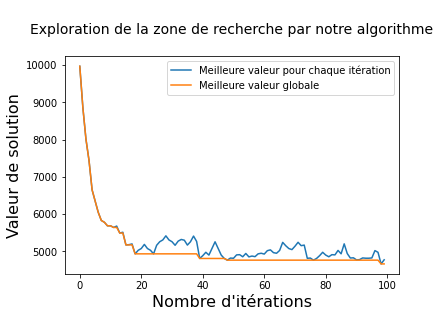

In [61]:
import time
import matplotlib.pyplot as plt

# Paramètres de génération du graphe
nbVilles=0
tempsMax=500

graphe = generer_matrice_pondere(matriceAdjacence)

# Modifier ce paramètre pour modifier le nombre d'itération maximum de la recherche tabou
iterMaximum=100
# Modifier ce paramètre pour modifier la taille maximum de la liste tabou
tabuMax=len(graphe)
# Modifier ce paramètre pour activer ou non l'utilisation du plus proche voisin comme chemin initial
useNearestNeighbor=True
# Modifier ce paramètre pour changer la ville de départ
departureCity=0

startTime = time.time()
sol, paths, bestPaths, initialPath=tabuSearch(sol, tabuLength=tabuMax, iterMax=iterMaximum, graphe=graphe)
execTime = (time.time() - startTime)

print("La valeur du chemin initial est :",str(weightSol(initialPath,graphe)))
print("\n---------------------------------------------")
#print("\nLe meilleur chemin trouvé est : " + str(resNearestNeighbor(sol)))
print("\nSa valeur est de : " + str(weightSol(sol,graphe)) + " mn, soit " + str("{:.2f}".format(weightSol(sol,graphe)/60)) + " h")
print("\nTemps d'execution : " + str(execTime) + " secondes\n\n")

# Affichage des résultats sur le graphique
plt.xlabel("Nombre d'itérations", fontsize=16)
plt.ylabel("Valeur de solution", fontsize=16)

res = plt.plot(range(iterMaximum), paths,label='Meilleure valeur pour chaque itération')
res = plt.plot(range(iterMaximum), bestPaths,label='Meilleure valeur globale')

plt.legend()
font2 = {'size':14}
plt.title("\nExploration de la zone de recherche par notre algorithme\n", loc = 'center',fontdict = font2)


#### 3.2.1.Implémentation de l'algorithme<a class="anchor" id="tabou"></a>
#### 3.2.2.Démonstration de l'algorithme<a class="anchor" id="demonstration"></a>
#### 3.2.3.Etude expérimentale<a class="anchor" id="demonstration"></a>
#### 3.2.3.1.Plan d'expérience <a class="anchor" id="demonstration"></a>


## 3.Bibliographie <a class="anchor" id="Bibliographie"></a>
- [Problèmes de tournées de véhicules avec contraintes](https://homepages.laas.fr/sungueve/Docs/PhD/These_SUNGUEVEU_20062009.pdf)
- [VRP reduction](https://web.mit.edu/urban_or_book/www/book/chapter6/6.4.12.html)